In [342]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [343]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [344]:
path = path ="/content/drive/MyDrive/greproject/trial.csv"
df=pd.read_csv(path)
df


,Serial No,GRE Score,Toefl Score,Ielts Score,Department,CGPA,Research,Project,Work Experience,University Ranking,University rating
0,1,299,105.0,7.5,cse,3.74,0,1,3.0,250,2
1,2,303,98.0,7,cse,3.68,0,0,0.0,250,2
2,3,300,98.0,7,cse,3.68,0,0,1.0,250,2
3,4,310,98.0,7,cse,3.78,1,1,2.0,133,3
4,5,306,98.0,7,cse,3.00,0,3,1.0,133,3
...,...,...,...,...,...,...,...,...,...,...,...
380,381,323,105.0,7.5,cse,3.78,0,0,0.0,67,4
381,382,320,105.0,7.5,cse,3.65,0,0,3.0,67,4
382,383,317,114.0,8,cse,3.81,0,1,2.0,67,4
383,384,324,94.0,6.5,cse,3.68,0,0,2.5,67,4


In [345]:

df.describe(include='all')


,Serial No,GRE Score,Toefl Score,Ielts Score,Department,CGPA,Research,Project,Work Experience,University Ranking,University rating
count,385.000000,385.000000,385.000000,385,385,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000
unique,NaN,NaN,NaN,11,6,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,7,cse,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,110,206,NaN,NaN,NaN,NaN,NaN,NaN
mean,193.000000,313.384416,99.681818,NaN,NaN,3.432987,0.254545,0.966234,1.212987,131.402597,3.150649
std,111.284171,10.225976,13.405706,NaN,NaN,0.284764,0.712709,1.711299,1.590364,98.027029,0.988557
min,1.000000,285.000000,6.500000,NaN,NaN,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,97.000000,307.000000,97.000000,NaN,NaN,3.250000,0.000000,0.000000,0.000000,53.000000,2.000000
50%,193.000000,315.000000,101.000000,NaN,NaN,3.460000,0.000000,0.000000,0.400000,105.000000,3.000000
75%,289.000000,321.000000,108.000000,NaN,NaN,3.650000,0.000000,1.000000,2.000000,209.000000,4.000000


In [346]:
  df.isnull().sum()


Serial No             0
GRE Score             0
Toefl Score           0
Ielts Score           0
Department            0
CGPA                  0
Research              0
Project               0
Work Experience       0
University Ranking    0
University rating     0
dtype: int64

**IDENTIFYING AND REMOVING OUTLIERS**

<Axes: >

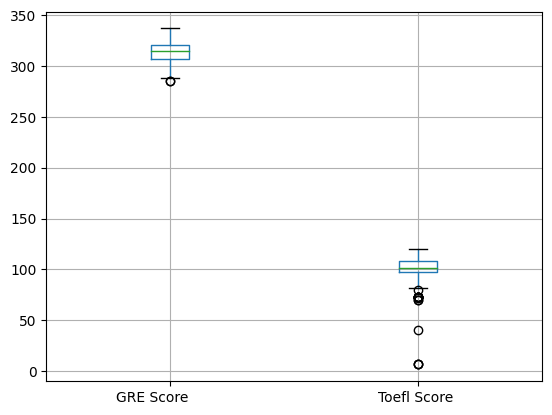

In [347]:
df.boxplot(column=['GRE Score        ','Toefl Score '])


<Axes: >

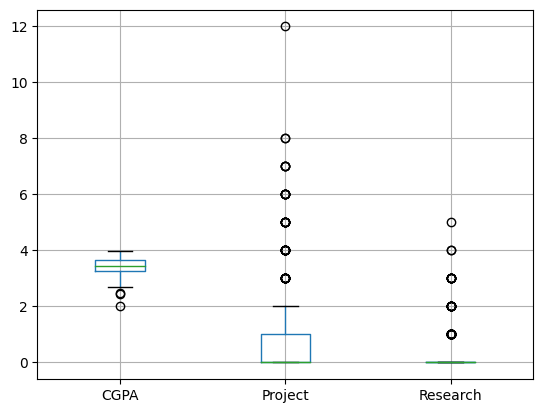

In [348]:
df.boxplot(column=['CGPA','Project','Research'])

<Axes: >

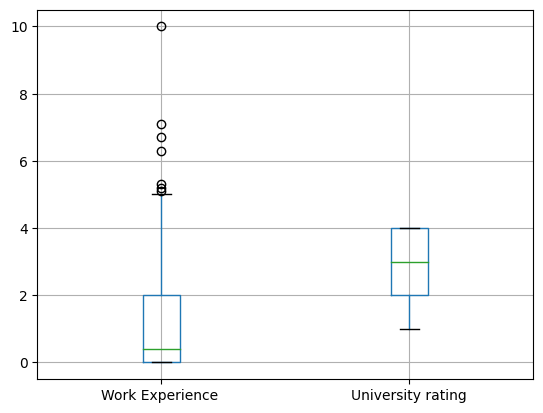

In [349]:
df.boxplot(column=['Work Experience ', 'University rating'])

**DROPING COLUMNS**

In [350]:
data1=df.copy()
data1.drop(['Serial No'],axis=1,inplace=True)

**CALCULATING QUANTILES FOR EACH FEATURE**

In [351]:
Q1=data1.quantile(0.25)
Q3=data1.quantile(0.75)
IQR=Q3-Q1
print(IQR)


GRE Score              14.0
Toefl Score            11.0
CGPA                    0.4
Research                0.0
Project                 1.0
Work Experience         2.0
University Ranking    156.0
University rating       2.0
dtype: float64


<ipython-input-351-5e2b99fd5460>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1=data1.quantile(0.25)
<ipython-input-351-5e2b99fd5460>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3=data1.quantile(0.75)


**IDENTIFYING OUTLIER**

In [352]:
df_out1 = data1[((data1 < (Q1 - 2.5 * IQR)) | (data1 > (Q3 + 2.5 * IQR))).any(axis=1)]
df_out1

<ipython-input-352-806671d6d471>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_out1 = data1[((data1 < (Q1 - 2.5 * IQR)) | (data1 > (Q3 + 2.5 * IQR))).any(axis=1)]


,GRE Score,Toefl Score,Ielts Score,Department,CGPA,Research,Project,Work Experience,University Ranking,University rating
3,310,98.0,7,cse,3.78,1,1,2.0,133,3
7,308,108.0,7.5,cse,3.84,0,8,1.0,115,3
9,305,100.0,7,cse,3.68,1,0,0.6,299,2
20,306,95.0,6.5,cse,2.00,0,0,5.0,219,2
41,309,98.0,7,cse,3.55,0,6,0.7,89,4
...,...,...,...,...,...,...,...,...,...,...
350,315,107.0,7.5,cse,3.58,1,1,1.6,60,4
351,317,114.0,8,cse,3.68,2,4,0.3,60,4
357,285,98.0,7,cse,3.20,1,3,0.0,209,2
374,310,112.0,8,ds,3.62,0,6,1.0,58,4


**REMOVING OUTLIERS**

In [353]:
df_out=data1[~((data1 < (Q1 - 2.5 * IQR)) | (data1 > (Q3 + 2.5 * IQR))).any(axis=1)]
data=df_out.copy()
print(data.shape)
data

(295, 10)


<ipython-input-353-a3b1278bca21>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_out=data1[~((data1 < (Q1 - 2.5 * IQR)) | (data1 > (Q3 + 2.5 * IQR))).any(axis=1)]


,GRE Score,Toefl Score,Ielts Score,Department,CGPA,Research,Project,Work Experience,University Ranking,University rating
0,299,105.0,7.5,cse,3.74,0,1,3.0,250,2
1,303,98.0,7,cse,3.68,0,0,0.0,250,2
2,300,98.0,7,cse,3.68,0,0,1.0,250,2
4,306,98.0,7,cse,3.00,0,3,1.0,133,3
5,311,85.0,6.5,cse,3.36,0,0,0.0,133,3
...,...,...,...,...,...,...,...,...,...,...
380,323,105.0,7.5,cse,3.78,0,0,0.0,67,4
381,320,105.0,7.5,cse,3.65,0,0,3.0,67,4
382,317,114.0,8,cse,3.81,0,1,2.0,67,4
383,324,94.0,6.5,cse,3.68,0,0,2.5,67,4


**UNIVARIATE ANALYSIS**

**Level ENCODER**

**preprocessing data**

In [354]:
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()
data['Department']=lc.fit_transform(data['Department'])
data['Ielts Score']=lc.fit_transform(data['Ielts Score'])
data['Research']=lc.fit_transform(data['Research'])



In [355]:
print(data['GRE Score        '].corr(data["GRE Score        "]))
print(data['GRE Score        '].corr(data["Toefl Score "]))
print(data['GRE Score        '].corr(data["Ielts Score"]))
print(data['GRE Score        '].corr(data["Department"]))
print(data['GRE Score        '].corr(data["CGPA"]))
print(data['GRE Score        '].corr(data["Project"]))
print(data['GRE Score        '].corr(data["Work Experience "]))
print(data['GRE Score        '].corr(data["University Ranking"]))
print(data['GRE Score        '].corr(data["University rating"]))


1.0
0.2912214841129166
0.2654306908019278
-0.1107283346529017
0.17148017444025743
-0.06860070728083452
-0.024366945638970735
-0.36602980743619956
0.30607369993278455


In [356]:
print(data['Toefl Score '].corr(data["GRE Score        "]))
print(data['Toefl Score '].corr(data["Toefl Score "]))
print(data['Toefl Score '].corr(data["Ielts Score"]))
print(data['Toefl Score '].corr(data["Department"]))
print(data['Toefl Score '].corr(data["CGPA"]))
print(data['Toefl Score '].corr(data["Project"]))
print(data['Toefl Score '].corr(data["Work Experience "]))
print(data['Toefl Score '].corr(data["University Ranking"]))
print(data['Toefl Score '].corr(data["University rating"]))

0.29122148411291665
0.9999999999999998
0.9662099406903002
0.03411722804980353
0.26768039654796383
0.04071411668725643
0.09480087572619597
-0.4896829642591143
0.4832242135638636


In [357]:
print(data['Ielts Score'].corr(data["GRE Score        "]))
print(data['Ielts Score'].corr(data["Toefl Score "]))
print(data['Ielts Score'].corr(data["Ielts Score"]))
print(data['Ielts Score'].corr(data["Department"]))
print(data['Ielts Score'].corr(data["CGPA"]))
print(data['Ielts Score'].corr(data["Project"]))
print(data['Ielts Score'].corr(data["Work Experience "]))
print(data['Ielts Score'].corr(data["University Ranking"]))
print(data['Ielts Score'].corr(data["University rating"]))

0.2654306908019278
0.9662099406903003
1.0
0.03283492512372157
0.25579859337473704
0.04062877309618116
0.09712975527694917
-0.46466487715080684
0.460142346827957


In [358]:
print(data['Department'].corr(data["GRE Score        "]))
print(data['Department'].corr(data["Toefl Score "]))
print(data['Department'].corr(data["Ielts Score"]))
print(data['Department'].corr(data["Department"]))
print(data['Department'].corr(data["CGPA"]))
print(data['Department'].corr(data["Project"]))
print(data['Department'].corr(data["Work Experience "]))
print(data['Department'].corr(data["University Ranking"]))
print(data['Department'].corr(data["University rating"]))


-0.11072833465290169
0.03411722804980353
0.03283492512372157
1.0
-0.1512165235922568
-0.045386599604377575
-0.06144236965334341
0.09232200423048746
-0.09359065490137632


In [359]:
print(data['Ielts Score'].corr(data["GRE Score        "]))
print(data['Ielts Score'].corr(data["Toefl Score "]))
print(data['Ielts Score'].corr(data["Ielts Score"]))
print(data['Ielts Score'].corr(data["Department"]))
print(data['Ielts Score'].corr(data["CGPA"]))
print(data['Ielts Score'].corr(data["Project"]))
print(data['Ielts Score'].corr(data["Work Experience "]))
print(data['Ielts Score'].corr(data["University Ranking"]))
print(data['Ielts Score'].corr(data["University rating"]))


0.2654306908019278
0.9662099406903003
1.0
0.03283492512372157
0.25579859337473704
0.04062877309618116
0.09712975527694917
-0.46466487715080684
0.460142346827957


In [360]:
print(data['CGPA'].corr(data["GRE Score        "]))
print(data['CGPA'].corr(data["Toefl Score "]))
print(data['CGPA'].corr(data["Ielts Score"]))
print(data['CGPA'].corr(data["Department"]))
print(data['CGPA'].corr(data["CGPA"]))
print(data['CGPA'].corr(data["Project"]))  # Modified line
print(data['CGPA'].corr(data["Work Experience "]))
print(data['CGPA'].corr(data["University Ranking"]))
print(data['CGPA'].corr(data["University rating"]))


0.17148017444025743
0.26768039654796383
0.25579859337473704
-0.1512165235922568
1.0
-0.023292712897346534
0.02815082442592124
-0.41683220231525786
0.3755400079259752


In [361]:
print(data['Project'].corr(data["GRE Score        "]))
print(data['Project'].corr(data["Toefl Score "]))
print(data['Project'].corr(data["Ielts Score"]))
print(data['Project'].corr(data["Department"]))
print(data['Project'].corr(data["CGPA"]))
print(data['Project'].corr(data["Project"]))
print(data['Project'].corr(data["Work Experience "]))
print(data['Project'].corr(data["University Ranking"]))
print(data['Project'].corr(data["University rating"]))

-0.06860070728083452
0.04071411668725643
0.04062877309618117
-0.045386599604377575
-0.023292712897346534
1.0
0.28778320545776126
0.03496270933868094
-0.02652495710880166


In [362]:
print(data['Work Experience '].corr(data["GRE Score        "]))
print(data['Work Experience '].corr(data["Toefl Score "]))
print(data['Work Experience '].corr(data["Ielts Score"]))
print(data['Work Experience '].corr(data["Department"]))
print(data['Work Experience '].corr(data["CGPA"]))
print(data['Work Experience '].corr(data["Project"]))
print(data['Work Experience '].corr(data["Work Experience "]))
print(data['Work Experience '].corr(data["University Ranking"]))
print(data['Work Experience '].corr(data["University rating"]))



-0.024366945638970735
0.09480087572619597
0.09712975527694917
-0.06144236965334341
0.028150824425921237
0.2877832054577613
0.9999999999999999
-0.06713859162749446
0.06901625708209766


In [363]:
print(data['University Ranking'].corr(data["GRE Score        "]))
print(data['University Ranking'].corr(data["Toefl Score "]))
print(data['University Ranking'].corr(data["Ielts Score"]))
print(data['University Ranking'].corr(data["Department"]))
print(data['University Ranking'].corr(data["CGPA"]))
print(data['University Ranking'].corr(data["Project"]))
print(data['University Ranking'].corr(data["Work Experience "]))
print(data['University Ranking'].corr(data["University Ranking"]))
print(data['University Ranking'].corr(data["University rating"]))



-0.3660298074361996
-0.4896829642591143
-0.4646648771508069
0.09232200423048746
-0.41683220231525786
0.03496270933868094
-0.06713859162749446
1.0
-0.9507544116075106


In [364]:
print(data['University rating'].corr(data["GRE Score        "]))
print(data['University rating'].corr(data["Toefl Score "]))
print(data['University rating'].corr(data["Ielts Score"]))
print(data['University rating'].corr(data["Department"]))
print(data['University rating'].corr(data["CGPA"]))
print(data['University rating'].corr(data["Project"]))
print(data['University rating'].corr(data["Work Experience "]))
print(data['University rating'].corr(data["University Ranking"]))
print(data['University rating'].corr(data["University rating"]))

0.30607369993278455
0.4832242135638635
0.46014234682795707
-0.09359065490137632
0.37554000792597525
-0.02652495710880166
0.06901625708209766
-0.9507544116075106
1.0


In [365]:
x=data.drop(['University rating'],axis=1)
y=data['University rating']

x.shape,y.shape


((295, 9), (295,))

In [366]:
data.dtypes

GRE Score               int64
Toefl Score           float64
Ielts Score             int64
Department              int64
CGPA                  float64
Research                int64
Project                 int64
Work Experience       float64
University Ranking      int64
University rating       int64
dtype: object

In [367]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=42)

In [368]:
scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)
test_x= scaler.fit_transform(test_x)

**MODEL SELECTION AND TRAINING**

In [369]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae


In [370]:

lr=LR()


In [371]:

lr.fit(train_x,train_y)

LinearRegression()

In [372]:
train_predict=lr.predict(train_x)
k=mae(train_predict,train_y)
print('train mean absolute error for training data ', k)

train mean absolute error for training data  0.2678103685397895


In [373]:
test_predict=lr.predict(test_x)
k=mae(test_predict,test_y)
print('test mean absolute error for training data ', k)

test mean absolute error for training data  0.269069242927532


**MODEL EVALUATION**

In [374]:
from sklearn.metrics import mean_squared_error

In [375]:
pred_train=lr.predict(train_x)
train_score=np.sqrt(mean_squared_error(train_y,pred_train))
print(train_score)

0.3006224393355957


In [376]:
pred_test=lr.predict(test_x)
test_score=np.sqrt(mean_squared_error(test_predict,test_y))
print(test_score)

0.3140018136324886


In [377]:
print('training score :',train_score)
print('validation score :',test_score)

training score : 0.3006224393355957
validation score : 0.3140018136324886


In [378]:
test=lr.score(test_x,test_y)*100
train=lr.score(train_x,train_y)*100
print("accuracy on train set:",train)
print("accuracy on test set:",test)

accuracy on train set: 90.72621804719302
accuracy on test set: 90.6199108240174


**Decesion Tree Regressor**

In [379]:
from sklearn.tree import DecisionTreeRegressor
dec_tree = DecisionTreeRegressor(random_state=42)
dec_tree.fit(train_x, train_y)
y_predict = dec_tree.predict(test_x)
dec_tree_score = (dec_tree.score(test_x, test_y))*100
dec_tree_score

96.14315496872828

**Random Forest**

In [380]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=110,max_depth=6,random_state=0)
forest.fit(train_x, train_y)
y_predict = forest.predict(test_x)
forest_score = (forest.score(test_x, test_y))*100
forest_score

96.09438659767171

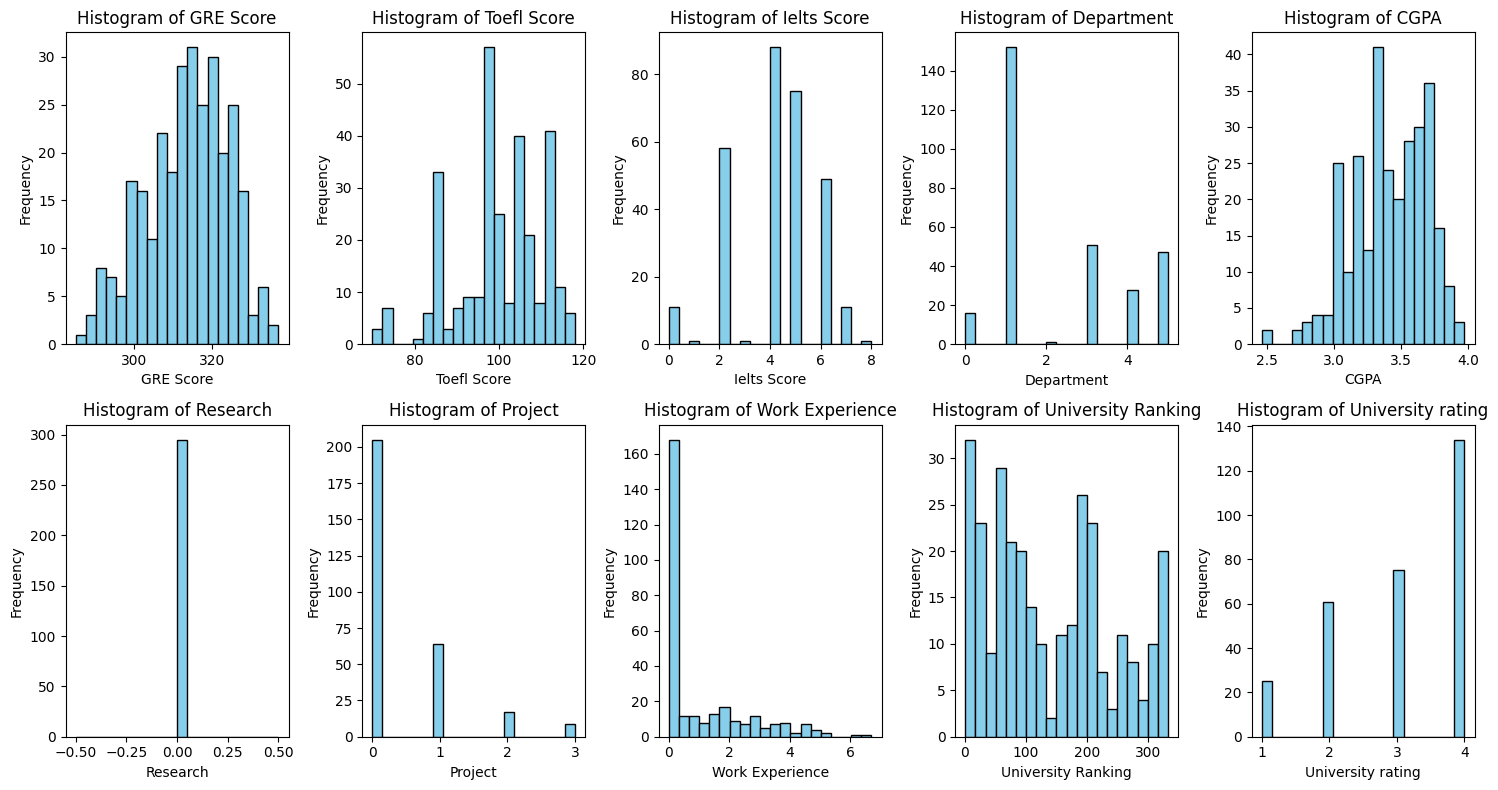

In [381]:
import matplotlib.pyplot as plt
import pandas as pd


selected_features = ['GRE Score', 'Toefl Score', 'Ielts Score', 'Department', 'CGPA', 'Research', 'Project', 'Work Experience', 'University Ranking', 'University rating']

data.columns = data.columns.str.strip()


fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 8))


axes = axes.flatten()


for i, feature in enumerate(selected_features):
    data[feature].plot(kind='hist', ax=axes[i], bins=20, edgecolor='black', color='skyblue')
    axes[i].set_title(f'Histogram of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')


plt.tight_layout()


plt.show()
